<h1>Interpolate FP cost term data</h1>

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_FP.csv', converters={'PARTY_ID': str, 'COM_ID': str, 'CNTR_SIZE': str})
df['POD'] = pd.to_datetime(df['POD'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].fillna(-1).astype(int)
df = df.dropna(subset=['ENCODED_TYPE'])
df['RATE'] = df['RATE'].fillna(-1).astype(int)
df = df.dropna(subset=['RATE'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].astype(int)


df.head()
df.info()
print(f'Dataset size: {df.shape}')


,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,POD_ID_EN
0,010,01004906,1004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,ECS010060200592,20060303,LKCMB,COLOMBO,2006-03-03,CTNR010060300015,40,HC,FP,650,1,2,2.432422e+09
1,010,01008573,1008573,WAN HAI INTERNATIONAL PTE LTD,ECS010060200181,20060305,JPOSA,OSAKA,2006-03-05,CTNR010060300111,20,GP,FP,370,2,2,9.123643e+08
2,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200248,20060305,IDSUB,SURABAYA,2006-03-05,CTNR010060300075,20,GP,FP,120,2,2,8.550661e+08
3,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200262,20060306,INNSA,NHAVA SHEVA ( JNPT ),2006-03-06,CTNR010060300081,40,HC,FP,1100,1,2,1.337392e+09
4,010,01004690,1004690,MAERSK SINGAPORE PTE LTD,ECS010060100367,20060221,MXZLO,"MANZANILLO , MEXICO",2006-02-21,CTNR010060200515,40,HC NOR,FP,3500,4,2,2.460062e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48407 entries, 0 to 48406
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48407 non-null  object        
 1   PARTY_ID      48407 non-null  object        
 2   PARTY_ID_EN   48407 non-null  int64         
 3   PARTY_NAME    48407 non-null  object        
 4   CSL_ID        48407 non-null  object        
 5   ETA_ETD_NO    48407 non-null  int64         
 6   ETD_POL_D     48407 non-null  object        
 7   POD_ID        48299 non-null  object        
 8   POD           48407 non-null  datetime64[ns]
 9   CNTR_ID       48407 non-null  object        
 10  CNTR_SIZE     48407 non-null  object        
 11  CNTR_TYPE     48404 non-null  object        
 12  COST_TERM     48407 non-null  object        
 13  RATE          48407 non-null  int32         
 14  ENCODED_TYPE  48407 non-null  int32         
 15  ENCODED_TERM  48407 non-null  int64 

<h4>Checking if dataset still contains any NAN values after datacleaning using SQL</h4>

In [124]:
if df.isna().any().any():
    print('Dataframe contains NaN values')
else:
    print('Dataframe does not contain NaN values')

Dataframe contains NaN values


<h4>Removing rows contains NAN values</h4>

In [125]:
df_clean = df.dropna().reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48296 entries, 0 to 48295
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48296 non-null  object        
 1   PARTY_ID      48296 non-null  object        
 2   PARTY_ID_EN   48296 non-null  int64         
 3   PARTY_NAME    48296 non-null  object        
 4   CSL_ID        48296 non-null  object        
 5   ETA_ETD_NO    48296 non-null  int64         
 6   ETD_POL_D     48296 non-null  object        
 7   POD_ID        48296 non-null  object        
 8   POD           48296 non-null  datetime64[ns]
 9   CNTR_ID       48296 non-null  object        
 10  CNTR_SIZE     48296 non-null  object        
 11  CNTR_TYPE     48296 non-null  object        
 12  COST_TERM     48296 non-null  object        
 13  RATE          48296 non-null  int32         
 14  ENCODED_TYPE  48296 non-null  int32         
 15  ENCODED_TERM  48296 non-null  int64 

In [126]:
print(df.keys())

Index(['COM_ID', 'PARTY_ID', 'PARTY_ID_EN', 'PARTY_NAME', 'CSL_ID',
       'ETA_ETD_NO', 'ETD_POL_D', 'POD_ID', 'POD', 'CNTR_ID', 'CNTR_SIZE',
       'CNTR_TYPE', 'COST_TERM', 'RATE', 'ENCODED_TYPE', 'ENCODED_TERM',
       'POD_ID_EN'],
      dtype='object')


In [127]:
sel_col = ['COM_ID','CSL_ID', 'CNTR_ID','ENCODED_TERM','COST_TERM','POD_ID','ETD_POL_D','PARTY_ID',
           'PARTY_ID_EN', 'PARTY_NAME','POD_ID_EN','ETA_ETD_NO','POD',
           'CNTR_SIZE','ENCODED_TYPE','CNTR_TYPE','RATE']

df_fp = df_clean[sel_col]
df_fp.head()
df_fp.info()

,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,010,ECS010060200592,CTNR010060300015,2,FP,COLOMBO,LKCMB,01004906,1004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,2.432422e+09,20060303,2006-03-03,40,1,HC,650
1,010,ECS010060200181,CTNR010060300111,2,FP,OSAKA,JPOSA,01008573,1008573,WAN HAI INTERNATIONAL PTE LTD,9.123643e+08,20060305,2006-03-05,20,2,GP,370
2,010,ECS010060200248,CTNR010060300075,2,FP,SURABAYA,IDSUB,01005114,1005114,KMTC (SINGAPORE) PTE LTD,8.550661e+08,20060305,2006-03-05,20,2,GP,120
3,010,ECS010060200262,CTNR010060300081,2,FP,NHAVA SHEVA ( JNPT ),INNSA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,1.337392e+09,20060306,2006-03-06,40,1,HC,1100
4,010,ECS010060100367,CTNR010060200515,2,FP,"MANZANILLO , MEXICO",MXZLO,01004690,1004690,MAERSK SINGAPORE PTE LTD,2.460062e+09,20060221,2006-02-21,40,4,HC NOR,3500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48296 entries, 0 to 48295
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48296 non-null  object        
 1   CSL_ID        48296 non-null  object        
 2   CNTR_ID       48296 non-null  object        
 3   ENCODED_TERM  48296 non-null  int64         
 4   COST_TERM     48296 non-null  object        
 5   POD_ID        48296 non-null  object        
 6   ETD_POL_D     48296 non-null  object        
 7   PARTY_ID      48296 non-null  object        
 8   PARTY_ID_EN   48296 non-null  int64         
 9   PARTY_NAME    48296 non-null  object        
 10  POD_ID_EN     48296 non-null  float64       
 11  ETA_ETD_NO    48296 non-null  int64         
 12  POD           48296 non-null  datetime64[ns]
 13  CNTR_SIZE     48296 non-null  object        
 14  ENCODED_TYPE  48296 non-null  int32         
 15  CNTR_TYPE     48296 non-null  object

In [128]:
# interpolate missing values
df_fp['POD'].dt.year.unique()

array([2006, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2018, 2019, 2020, 2021, 2016, 2017, 2022, 2023], dtype=int64)

In [129]:
# Sorting by date so can interpolate the missing dates while using cost median 
df_fp = df_fp.sort_values(by='POD').reset_index()
df_fp.head()
df_fp['POD'].dt.year.unique()

,index,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,1351,010,ECS01050600041,CTNR010050700351,2,FP,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2.397848e+09,20050715,2005-07-15,40,4,HC NOR,4070
1,2144,010,ECS01050600193,CTNR010050700352,2,FP,HAMBURG,DEHAM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,5.185729e+08,20050715,2005-07-15,20,2,GP,900
2,3627,010,ECS01050600053,CTNR010050700378,2,FP,KEELUNG,TWKEL,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,2.562089e+09,20050715,2005-07-15,20,2,GP,200
3,2643,010,ECS01050600058,CTNR010050700371,2,FP,KAOHSIUNG,TWKHH,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,1.952509e+09,20050715,2005-07-15,20,2,GP,200
4,3481,010,ECS01050700012,CTNR010050700367,2,FP,JAKARTA,IDJKT,01003047,1003047,HANJIN SHIPPING (S) PTE LTD,2.909437e+09,20050715,2005-07-15,40,1,HC,60


array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

<h3>Interpolate to fill the missing data gap</h3>

<Axes: xlabel='POD'>

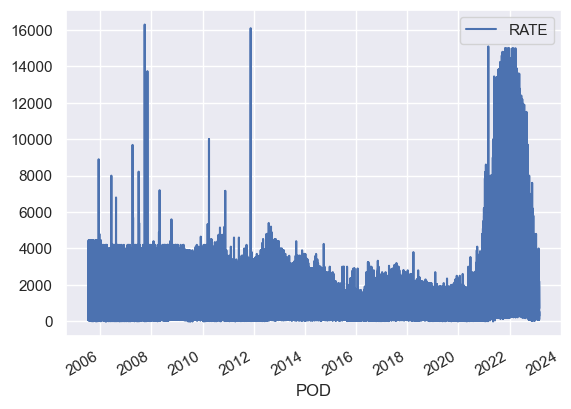

In [130]:
interpolated_data = df_fp.interpolate(method='ffill')
interpolated_data.plot(x='POD', y='RATE')
plt.show()

In [131]:
# Removing rows that contains year 2002
df2 = interpolated_data.loc[interpolated_data['POD'].dt.year != 2002].reset_index(drop=True)
df2.head()
df2.info()

,index,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,1351,010,ECS01050600041,CTNR010050700351,2,FP,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2.397848e+09,20050715,2005-07-15,40,4,HC NOR,4070
1,2144,010,ECS01050600193,CTNR010050700352,2,FP,HAMBURG,DEHAM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,5.185729e+08,20050715,2005-07-15,20,2,GP,900
2,3627,010,ECS01050600053,CTNR010050700378,2,FP,KEELUNG,TWKEL,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,2.562089e+09,20050715,2005-07-15,20,2,GP,200
3,2643,010,ECS01050600058,CTNR010050700371,2,FP,KAOHSIUNG,TWKHH,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,1.952509e+09,20050715,2005-07-15,20,2,GP,200
4,3481,010,ECS01050700012,CTNR010050700367,2,FP,JAKARTA,IDJKT,01003047,1003047,HANJIN SHIPPING (S) PTE LTD,2.909437e+09,20050715,2005-07-15,40,1,HC,60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48296 entries, 0 to 48295
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         48296 non-null  int64         
 1   COM_ID        48296 non-null  object        
 2   CSL_ID        48296 non-null  object        
 3   CNTR_ID       48296 non-null  object        
 4   ENCODED_TERM  48296 non-null  int64         
 5   COST_TERM     48296 non-null  object        
 6   POD_ID        48296 non-null  object        
 7   ETD_POL_D     48296 non-null  object        
 8   PARTY_ID      48296 non-null  object        
 9   PARTY_ID_EN   48296 non-null  int64         
 10  PARTY_NAME    48296 non-null  object        
 11  POD_ID_EN     48296 non-null  float64       
 12  ETA_ETD_NO    48296 non-null  int64         
 13  POD           48296 non-null  datetime64[ns]
 14  CNTR_SIZE     48296 non-null  object        
 15  ENCODED_TYPE  48296 non-null  int32 

<Axes: xlabel='POD'>

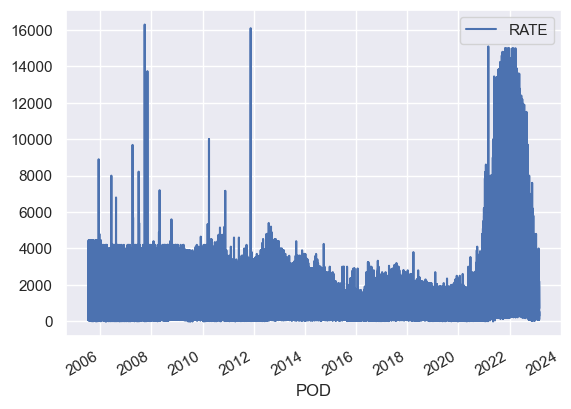

In [132]:
df2.plot(x='POD', y='RATE')
plt.show()

In [133]:
# Checking for negative cost rate
for values in df2['RATE']:
    if values <= 0:
        print(values)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [134]:
df3 = df2.loc[df2['RATE'] > 0].reset_index(drop=True)
df3.head()
df3.info()

,index,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,POD,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,1351,010,ECS01050600041,CTNR010050700351,2,FP,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2.397848e+09,20050715,2005-07-15,40,4,HC NOR,4070
1,2144,010,ECS01050600193,CTNR010050700352,2,FP,HAMBURG,DEHAM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,5.185729e+08,20050715,2005-07-15,20,2,GP,900
2,3627,010,ECS01050600053,CTNR010050700378,2,FP,KEELUNG,TWKEL,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,2.562089e+09,20050715,2005-07-15,20,2,GP,200
3,2643,010,ECS01050600058,CTNR010050700371,2,FP,KAOHSIUNG,TWKHH,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,1.952509e+09,20050715,2005-07-15,20,2,GP,200
4,3481,010,ECS01050700012,CTNR010050700367,2,FP,JAKARTA,IDJKT,01003047,1003047,HANJIN SHIPPING (S) PTE LTD,2.909437e+09,20050715,2005-07-15,40,1,HC,60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48274 entries, 0 to 48273
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         48274 non-null  int64         
 1   COM_ID        48274 non-null  object        
 2   CSL_ID        48274 non-null  object        
 3   CNTR_ID       48274 non-null  object        
 4   ENCODED_TERM  48274 non-null  int64         
 5   COST_TERM     48274 non-null  object        
 6   POD_ID        48274 non-null  object        
 7   ETD_POL_D     48274 non-null  object        
 8   PARTY_ID      48274 non-null  object        
 9   PARTY_ID_EN   48274 non-null  int64         
 10  PARTY_NAME    48274 non-null  object        
 11  POD_ID_EN     48274 non-null  float64       
 12  ETA_ETD_NO    48274 non-null  int64         
 13  POD           48274 non-null  datetime64[ns]
 14  CNTR_SIZE     48274 non-null  object        
 15  ENCODED_TYPE  48274 non-null  int32 

(array([14.55560538, 10.69127312,  7.49707632, ...,  8.30026986,
        8.30026986,  8.30026986]), 0.12424085598994558)


(array([[3.2000e+01, 3.6800e+02, 7.6600e+02, 7.4080e+03, 1.0155e+04,
         1.0803e+04, 1.3650e+04, 3.7310e+03, 8.4800e+02, 5.1300e+02],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([ 0.        ,  1.88083566,  3.76167132,  5.64250698,  7.52334264,
         9.40417829, 11.28501395, 13.16584961, 15.04668527, 16.92752093,
        18.80835659]),
 <a list of 2 BarContainer objects>)

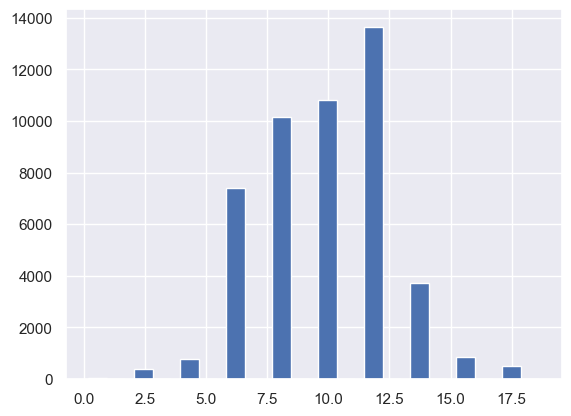

In [135]:
from scipy.stats import boxcox

# Doing symmetric distribution to determine to agg duplicated cost rate on the same date using mean or median
lambda_ = boxcox(df3['RATE'])
print(lambda_)
plt.hist(lambda_, bins=10)
plt.show()

<p>Negatively skewed data, it is usually recommended to use the median as the measure of central tendency instead of the mean. </p>

In [136]:
aggregation = {'COM_ID': lambda x: x.iloc[0], 
               'CSL_ID': lambda x: x.iloc[0],
               'CNTR_ID': lambda x: x.iloc[0],
               'ENCODED_TERM': lambda x: x.iloc[0],
               'COST_TERM': lambda x: x.iloc[0],
               'POD_ID': lambda x: x.iloc[0],
               'ETD_POL_D': lambda x: x.iloc[0],
               'PARTY_ID': lambda x: x.iloc[0],
               'PARTY_ID_EN': lambda x: x.iloc[0],
               'PARTY_NAME': lambda x: x.iloc[0],
               'POD_ID_EN': lambda x: x.iloc[0],
               'ETA_ETD_NO': lambda x: x.iloc[0],
               'CNTR_SIZE': lambda x: x.iloc[0],
               'ENCODED_TYPE': lambda x: x.iloc[0],
               'CNTR_TYPE': lambda x: x.iloc[0], 
               'RATE': 'median'}

# perform the aggregation and reset the index
df4 = df3.groupby('POD').agg(aggregation).reset_index()
df4.head()
df4.info()

,POD,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,2005-07-15,010,ECS01050600041,CTNR010050700351,2,FP,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2.397848e+09,20050715,40,4,HC NOR,200.0
1,2005-07-16,010,ECS01050600336,CTNR010050700365,2,FP,HAIPHONG,VNHPH,010003662,10003662,S-ASIA CONTAINER LINE PTE LTD,2.507198e+09,20050716,40,1,HC,930.0
2,2005-07-17,010,ECS01050600231,CTNR010050700459,2,FP,XIAMEN,CNXMN,01001118,1001118,CASH-FORWARDER A/C,9.743737e+08,20050717,20,2,GP,650.0
3,2005-07-18,010,ECS01050600103,CTNR010050700442,2,FP,PIRAEUS,GRPIR,01001118,1001118,CASH-FORWARDER A/C,3.112912e+09,20050718,40,1,HC,2275.0
4,2005-07-19,010,ECS01050600198,CTNR010050700543,2,FP,HAMBURG,DEHAM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,5.185729e+08,20050719,40,2,GP,1350.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6301 non-null   datetime64[ns]
 1   COM_ID        6301 non-null   object        
 2   CSL_ID        6301 non-null   object        
 3   CNTR_ID       6301 non-null   object        
 4   ENCODED_TERM  6301 non-null   int64         
 5   COST_TERM     6301 non-null   object        
 6   POD_ID        6301 non-null   object        
 7   ETD_POL_D     6301 non-null   object        
 8   PARTY_ID      6301 non-null   object        
 9   PARTY_ID_EN   6301 non-null   int64         
 10  PARTY_NAME    6301 non-null   object        
 11  POD_ID_EN     6301 non-null   float64       
 12  ETA_ETD_NO    6301 non-null   int64         
 13  CNTR_SIZE     6301 non-null   object        
 14  ENCODED_TYPE  6301 non-null   int32         
 15  CNTR_TYPE     6301 non-null   object  

<Axes: xlabel='POD'>

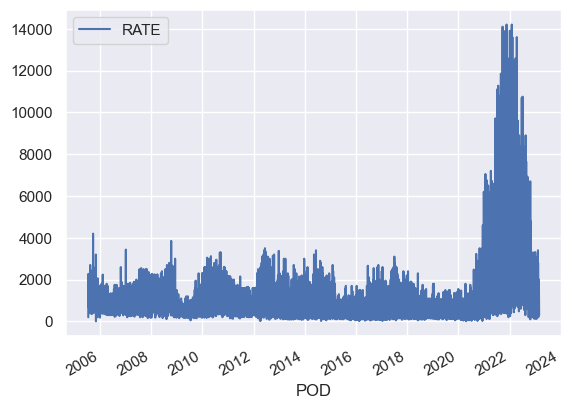

In [137]:
df4.plot(x='POD', y='RATE')
plt.show()

<h3>Casting All to INT32 Type</h3>

In [138]:
df4['CNTR_SIZE'] = df4['CNTR_SIZE'].astype(np.int32)
df4['RATE'] = df4['RATE'].astype(np.int32)
df4['PARTY_ID_EN'] = df4['PARTY_ID_EN'].astype(np.int32)
df4['POD_ID_EN'] = df4['POD_ID_EN'].astype(np.int64)
df4['ETA_ETD_NO'] = df4['ETA_ETD_NO'].astype(np.int32)
df4.info()
df4.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6301 non-null   datetime64[ns]
 1   COM_ID        6301 non-null   object        
 2   CSL_ID        6301 non-null   object        
 3   CNTR_ID       6301 non-null   object        
 4   ENCODED_TERM  6301 non-null   int64         
 5   COST_TERM     6301 non-null   object        
 6   POD_ID        6301 non-null   object        
 7   ETD_POL_D     6301 non-null   object        
 8   PARTY_ID      6301 non-null   object        
 9   PARTY_ID_EN   6301 non-null   int32         
 10  PARTY_NAME    6301 non-null   object        
 11  POD_ID_EN     6301 non-null   int64         
 12  ETA_ETD_NO    6301 non-null   int32         
 13  CNTR_SIZE     6301 non-null   int32         
 14  ENCODED_TYPE  6301 non-null   int32         
 15  CNTR_TYPE     6301 non-null   object  

,POD,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,2005-07-15,010,ECS01050600041,CTNR010050700351,2,FP,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050715,40,4,HC NOR,200
1,2005-07-16,010,ECS01050600336,CTNR010050700365,2,FP,HAIPHONG,VNHPH,010003662,10003662,S-ASIA CONTAINER LINE PTE LTD,2507197949,20050716,40,1,HC,930
2,2005-07-17,010,ECS01050600231,CTNR010050700459,2,FP,XIAMEN,CNXMN,01001118,1001118,CASH-FORWARDER A/C,974373682,20050717,20,2,GP,650
3,2005-07-18,010,ECS01050600103,CTNR010050700442,2,FP,PIRAEUS,GRPIR,01001118,1001118,CASH-FORWARDER A/C,3112912200,20050718,40,1,HC,2275
4,2005-07-19,010,ECS01050600198,CTNR010050700543,2,FP,HAMBURG,DEHAM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,518572916,20050719,40,2,GP,1350


<h4>Removing Dates from 2023 onwards as 2023 is used to test test the accuracy of the cost rate forecast.</h4>

<Figure size 6000x2000 with 0 Axes>

<Axes: xlabel='POD'>

<Figure size 6000x2000 with 0 Axes>

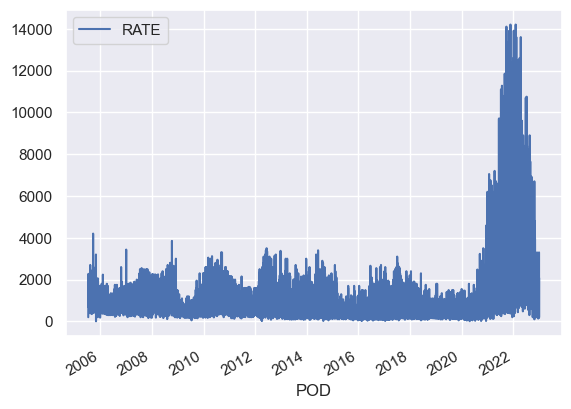

,POD,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,2005-07-15,010,ECS01050600041,CTNR010050700351,2,FP,AUCKLAND,NZAKL,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,2397847664,20050715,40,4,HC NOR,200
1,2005-07-16,010,ECS01050600336,CTNR010050700365,2,FP,HAIPHONG,VNHPH,010003662,10003662,S-ASIA CONTAINER LINE PTE LTD,2507197949,20050716,40,1,HC,930
2,2005-07-17,010,ECS01050600231,CTNR010050700459,2,FP,XIAMEN,CNXMN,01001118,1001118,CASH-FORWARDER A/C,974373682,20050717,20,2,GP,650
3,2005-07-18,010,ECS01050600103,CTNR010050700442,2,FP,PIRAEUS,GRPIR,01001118,1001118,CASH-FORWARDER A/C,3112912200,20050718,40,1,HC,2275
4,2005-07-19,010,ECS01050600198,CTNR010050700543,2,FP,HAMBURG,DEHAM,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,518572916,20050719,40,2,GP,1350


0      2005-07-15
1      2005-07-16
2      2005-07-17
3      2005-07-18
4      2005-07-19
          ...    
6244   2022-12-27
6245   2022-12-28
6246   2022-12-29
6247   2022-12-30
6248   2022-12-31
Name: POD, Length: 6249, dtype: datetime64[ns]


In [139]:
# Filter out the rows with a date in 2023
df_before_2023 = df4[df4['POD'] < '2023-01-01'].reset_index(drop=True)
df_2023_and_after = df4[df4['POD'] >= '2023-01-01'].reset_index(drop=True)


plt.figure(figsize=(60, 20))
df_before_2023.plot(x='POD', y='RATE')
plt.show()
df_before_2023.head()
print(df_before_2023['POD'])

<Figure size 6000x3000 with 0 Axes>

<Axes: xlabel='POD'>

<Figure size 6000x3000 with 0 Axes>

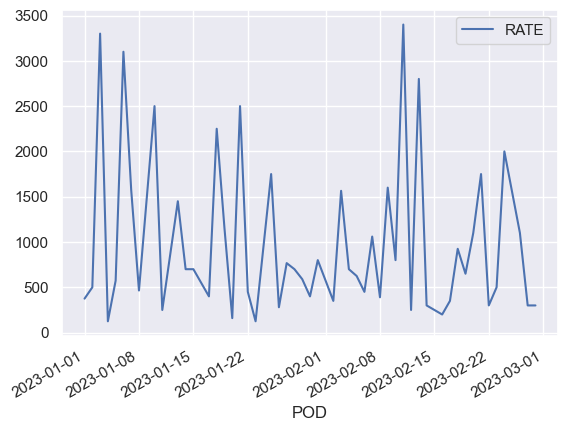

,POD,COM_ID,CSL_ID,CNTR_ID,ENCODED_TERM,COST_TERM,POD_ID,ETD_POL_D,PARTY_ID,PARTY_ID_EN,PARTY_NAME,POD_ID_EN,ETA_ETD_NO,CNTR_SIZE,ENCODED_TYPE,CNTR_TYPE,RATE
0,2023-01-01,010,ECS010221200250,010000300702,2,FP,LAEM CHABANG,THLCH,01006636,1006636,SAMUDERA SHIPPING LINE LTD,2283159604,20230101,40,1,HC,375
1,2023-01-02,010,ECS010221100414,010000296079,2,FP,DURBAN,ZADUR,010026822,10026822,OCEAN NETWORK EXPRESS PTE LTD,3893107451,20230102,40,1,HC,500
2,2023-01-03,010,ECS010221200039,010000282060,2,FP,PORT LOUIS,MUPLU,01005812,1005812,PACIFIC INTERNATIONAL LINES (PTE) LTD,1399520203,20230103,40,1,HC,3300
3,2023-01-04,010,ECS010221100260,010000299662,2,FP,SHANGHAI,CNSHA,01005114,1005114,KMTC (SINGAPORE) PTE LTD,2239773858,20230104,40,1,HC,125
4,2023-01-05,010,ECS010221200072,010000292993,2,FP,SANTOS,BRSSZ,010026822,10026822,OCEAN NETWORK EXPRESS PTE LTD,1953456901,20230105,40,1,HC,574


0    2023-01-01
1    2023-01-02
2    2023-01-03
3    2023-01-04
4    2023-01-05
5    2023-01-06
6    2023-01-07
7    2023-01-08
8    2023-01-10
9    2023-01-11
10   2023-01-13
11   2023-01-14
12   2023-01-15
13   2023-01-17
14   2023-01-18
15   2023-01-19
16   2023-01-20
17   2023-01-21
18   2023-01-22
19   2023-01-23
20   2023-01-25
21   2023-01-26
22   2023-01-27
23   2023-01-28
24   2023-01-29
25   2023-01-30
26   2023-01-31
27   2023-02-02
28   2023-02-03
29   2023-02-04
30   2023-02-05
31   2023-02-06
32   2023-02-07
33   2023-02-08
34   2023-02-09
35   2023-02-10
36   2023-02-11
37   2023-02-12
38   2023-02-13
39   2023-02-14
40   2023-02-16
41   2023-02-17
42   2023-02-18
43   2023-02-19
44   2023-02-20
45   2023-02-21
46   2023-02-22
47   2023-02-23
48   2023-02-24
49   2023-02-26
50   2023-02-27
51   2023-02-28
Name: POD, dtype: datetime64[ns]


In [140]:
plt.figure(figsize=(60, 30))
df_2023_and_after.plot(x='POD', y='RATE')
plt.show()
df_2023_and_after.head()
print(df_2023_and_after['POD'])

In [141]:
df_before_2023.info()
df_before_2023.to_csv('CR_FP_PREP_0522.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6249 non-null   datetime64[ns]
 1   COM_ID        6249 non-null   object        
 2   CSL_ID        6249 non-null   object        
 3   CNTR_ID       6249 non-null   object        
 4   ENCODED_TERM  6249 non-null   int64         
 5   COST_TERM     6249 non-null   object        
 6   POD_ID        6249 non-null   object        
 7   ETD_POL_D     6249 non-null   object        
 8   PARTY_ID      6249 non-null   object        
 9   PARTY_ID_EN   6249 non-null   int32         
 10  PARTY_NAME    6249 non-null   object        
 11  POD_ID_EN     6249 non-null   int64         
 12  ETA_ETD_NO    6249 non-null   int32         
 13  CNTR_SIZE     6249 non-null   int32         
 14  ENCODED_TYPE  6249 non-null   int32         
 15  CNTR_TYPE     6249 non-null   object  

In [142]:
df_2023_and_after.info()
df_2023_and_after.to_csv('CR_FP_PREP_23.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           52 non-null     datetime64[ns]
 1   COM_ID        52 non-null     object        
 2   CSL_ID        52 non-null     object        
 3   CNTR_ID       52 non-null     object        
 4   ENCODED_TERM  52 non-null     int64         
 5   COST_TERM     52 non-null     object        
 6   POD_ID        52 non-null     object        
 7   ETD_POL_D     52 non-null     object        
 8   PARTY_ID      52 non-null     object        
 9   PARTY_ID_EN   52 non-null     int32         
 10  PARTY_NAME    52 non-null     object        
 11  POD_ID_EN     52 non-null     int64         
 12  ETA_ETD_NO    52 non-null     int32         
 13  CNTR_SIZE     52 non-null     int32         
 14  ENCODED_TYPE  52 non-null     int32         
 15  CNTR_TYPE     52 non-null     object      

<ol>
    <li>There are total of 52 rows of data after and equal year 2023</li>
    <li>There are total of 6249 rows of data before year 2023</li>
<ol>
